In [14]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
from gensim import corpora, models, similarities

In [4]:
f = '../data/sherlock_current_wtext.csv'

In [7]:
df = pd.read_csv(f)

In [8]:
df_l = df[['PublishDate','Text','Title', 'Characters']]
df_l = df_l[df_l.Characters.notnull()]
df_l = df_l[df_l.PublishDate.notnull()]
df_l = df_l[df_l.Text.notnull()]

In [29]:
def create_sentences_list(text):
    text = text.split('.')
    sentences = []
    stops = set(stopwords.words("english"))
    for i in text:
        sentence = i.split(' ')
        sentence = [i.lower().replace(',', '') for i in sentence]
        sentence = [i for i in sentence if i not in stops]
        sentences.append(sentence)
    return sentences

In [10]:
def create_word2vec_model(text,window = 10, min_count=5):
    model = models.Word2Vec(text, window = window, min_count=min_count)
    return model

In [44]:
def create_time_model(df):
    t = ''.join([i for i in df.Text.astype(str)])
    works = create_sentences_list(t)
    model = create_word2vec_model(works)
    return model

In [46]:
def create_df_time(df, time):
    return df[df.PublishDate.str[:7] == time]

In [73]:
timelist = df_l.PublishDate.drop_duplicates().tolist()
timelist = [str(i)[:7] for i in timelist]
timelist = sorted(list(set(timelist)))
timelist = timelist[2:]

In [74]:
timelist = timelist[30:]

In [75]:
timelist

['2013-01',
 '2013-02',
 '2013-03',
 '2013-04',
 '2013-05',
 '2013-06',
 '2013-07',
 '2013-08',
 '2013-09',
 '2013-10',
 '2013-11',
 '2013-12',
 '2014-01',
 '2014-02',
 '2014-03',
 '2014-04',
 '2014-05',
 '2014-06',
 '2014-07',
 '2014-08',
 '2014-09',
 '2014-10',
 '2014-11',
 '2014-12',
 '2015-01',
 '2015-02',
 '2015-03',
 '2015-04',
 '2015-05',
 '2015-06',
 '2015-07',
 '2015-08',
 '2015-09',
 '2015-10',
 '2015-11']

In [76]:
for i in timelist:
    df_time = create_df_time(df, i)
#     print 'vocabulary size:', sum([len(i) for i in df_time.Text.tolist() if type(i) == 'list']
    word2vec = create_time_model(df_time)
    break

In [77]:
word2vec.most_similar('sherlock', topn = 30)

[('asherlock', 0.6718976497650146),
 ('greg', 0.5631346702575684),
 ('mycroft', 0.5298743844032288),
 ('martin', 0.4533124566078186),
 ('"sherlock', 0.44485557079315186),
 ('sherlock\xe2\x80\x99s', 0.44300878047943115),
 ("sherlock's", 0.44205307960510254),
 ('\xe2\x80\x9dasherlock', 0.4406193494796753),
 ('ahe', 0.43572333455085754),
 ('\xe2\x80\x9dsherlock', 0.42840689420700073),
 ('\xc2\xa0sherlock', 0.42093735933303833),
 ('violet', 0.40982651710510254),
 ('detective', 0.3991893231868744),
 ('john', 0.39565035700798035),
 ('hamish', 0.3943081498146057),
 ('\tsherlock', 0.38439249992370605),
 ('"asherlock', 0.38069117069244385),
 ('lestrade', 0.3780618906021118),
 ('"lead', 0.372641921043396),
 ('finally', 0.3597277104854584),
 ('molly', 0.35484302043914795),
 ('afton', 0.3516116142272949),
 ('harry', 0.34682756662368774),
 ('gabriel', 0.3423728346824646),
 ('flatmate', 0.3423357605934143),
 ('quickly', 0.34232985973358154),
 ('mike', 0.34053710103034973),
 ('simply', 0.340268135070

In [210]:
kappas_2_categories_labmit  = [i for i in kappas_2_categories_labmit if i != 0]

In [212]:
kappas_4_categories_labmit = [i for i in kappas_4_categories_labmit if i != 0]

In [103]:
len(timelist)

68

In [40]:
kappas_4_categories = kappas_4_categories[4:]

In [34]:
kappas_5_categories = kappas_5_categories[4:]

In [4]:
kappas_3_catetories = [-0.006060606060605949,
 -0.00763358778625946,
 -0.008333333333333475,
 -0.006024096385542182,
 -0.005128205128205229,
 -0.003816793893129649,
 -0.005524861878452932,
 -0.005464480874316914,
 -0.004255319148936204,
 -0.004672897196261544,
 -0.004878048780487735,
 -0.0035460992907801626,
 -0.003174603174603269,
 -0.004504504504504384,
 -0.0035714285714285353,
 -0.002985074626865777,
 -0.0018656716417909502,
 -0.000862068965517197,
 -0.0009425070688030378,
 -0.0010288065843622072,
 -0.0008673026886380636,
 -0.0010070493454178724,
 -0.0008467400508043246,
 -0.000799999999999867,
 -0.001012145748987833,
 -0.0010940919037196483,
 -0.0011049723756906566,
 -0.0009970089730809845,
 -0.00069541029207247,
 -0.0006165228113439129,
 -0.000735294117646938,
 -0.0008517887563885242,
 -0.0007955449482894093,
 -0.0008278145695365748,
 -0.0007380073800738492,
 -0.0006373486297003819,
 -0.0018587360594795827,
 -0.0013531799729363458,
 -0.0008410428931876706,
 -0.0009107468123860661,
 -0.0006108735491753095,
 -0.00041101520756271277,
 -0.0005030181086519858,
 -0.0006056935190793546,
 -0.0006397952655150472,
 -0.0007241129616219084,
 -0.0007267441860463185,
 -0.0006226650062266549,
 -0.0007158196134573252,
 -0.0008264462809917098,
 -0.0009803921568627943,
 -0.0009832841691248659,
 -0.0008517887563884052,
 -0.0009587727708532255,
 -0.0009940357852884075,
 -0.0010718113612003743,
 -0.0011918951132300392,
 -0.0010638297872340643,
 -0.001201923076923064,
 -0.0009208103130756535,
 -0.001135073779795609,
 -0.0013717421124828523,
 -0.0013458950201883082,
 -0.0017361111111111557]

In [7]:
kappas_10_categories = [-0.0062499999999999795,
 -0.008064516129032235,
 -0.009259259259259396,
 -0.007092198581560296,
 -0.0060240963855420935,
 -0.004184100418410051,
 -0.006578947368421204,
 -0.006211180124223671,
 -0.005154639175257748,
 -0.005405405405405311,
 -0.005617977528089859,
 -0.00414937759336098,
 -0.0037735849056604134,
 -0.005319148936169998,
 -0.004347826086956571,
 -0.0035842293906810352,
 -0.0021786492374728564,
 -0.0010309278350515677,
 -0.001123595505617877,
 -0.0012391573729863977,
 -0.001064962726304681,
 -0.001225490196078397,
 -0.0010298661174048102,
 -0.0009960159362550215,
 -0.001261034047919299,
 -0.0013831258644535134,
 -0.0013947001394700401,
 -0.0012254901960784678,
 -0.0008389261744966456,
 -0.0007651109410864307,
 -0.0008928571428570983,
 -0.0010752688172043622,
 -0.0009727626459144811,
 -0.0010101010101009641,
 -0.0008688097306688744,
 -0.0007733952049497606,
 -0.0021691973969631376,
 -0.0016393442622952771,
 -0.0010141987829614674,
 -0.0010775862068964,
 -0.0007007708479323995,
 -0.00047664442326030807,
 -0.0005820721769499923,
 -0.0007358351729212084,
 -0.0007776049766719843,
 -0.0008826125330978845,
 -0.0008896797153024611,
 -0.0007651109410864994,
 -0.0008591065292095216,
 -0.0010152284263959907,
 -0.0012106537530266702,
 -0.0011834319526627056,
 -0.0010351966873705161,
 -0.0011286681715575145,
 -0.0012315270935959965,
 -0.001326259946949658,
 -0.0014836795252226272,
 -0.0013698630136987366,
 -0.0015313935681469666,
 -0.0011494252873563283,
 -0.001459854014598568,
 -0.0017035775127767668,
 -0.0017064846416383356,
 -0.002096436058700306]

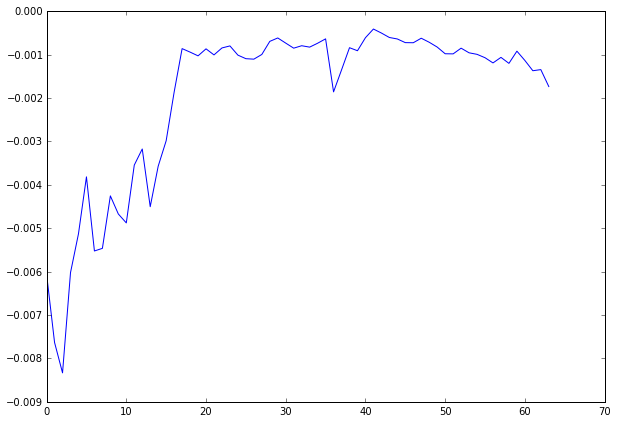

In [6]:
plt.figure(figsize = (10,7))
plt.plot(kappas_3_catetories)

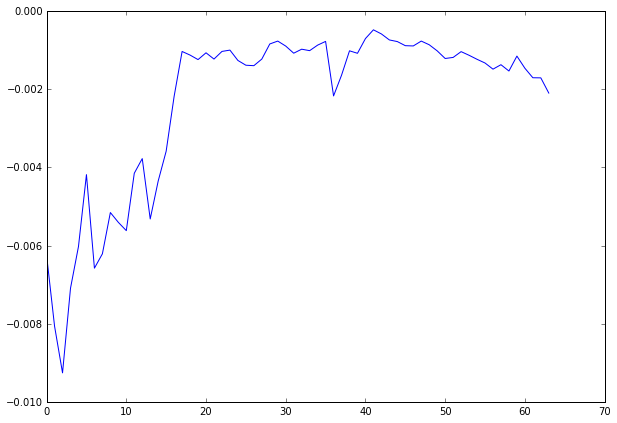

In [8]:
plt.figure(figsize = (10,7))
plt.plot(kappas_10_categories)

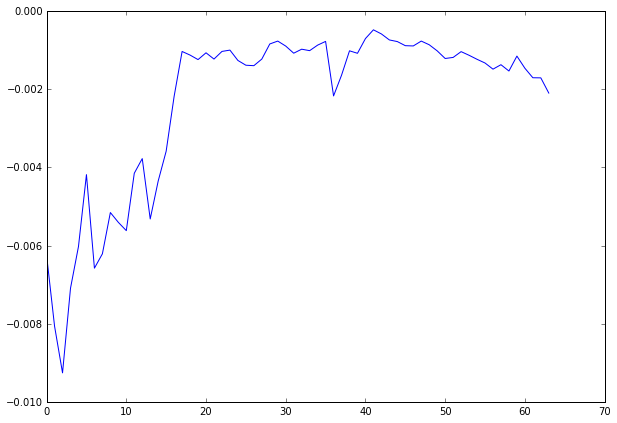

In [35]:
plt.figure(figsize = (10,7))
plt.plot(kappas_5_categories)

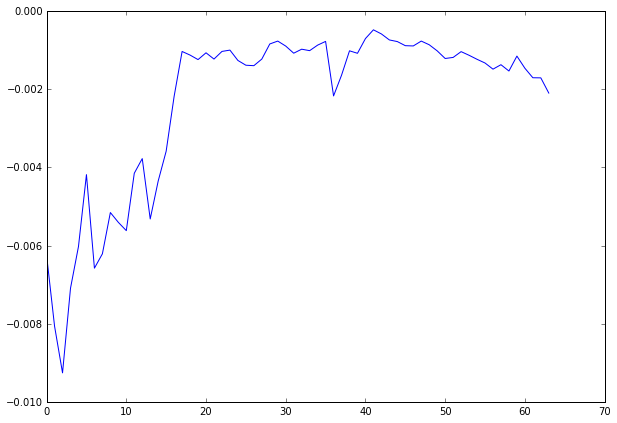

In [42]:
plt.figure(figsize = (10,7))
plt.plot(kappas_4_categories)

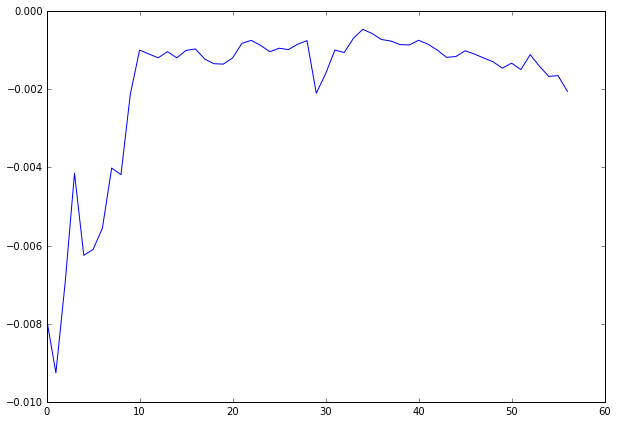

In [211]:
plt.figure(figsize = (10,7))
plt.plot(kappas_2_categories_labmit)

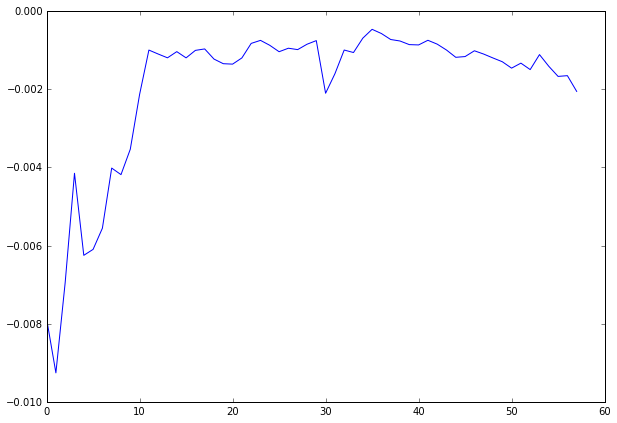

In [213]:
plt.figure(figsize = (10,7))
plt.plot(kappas_4_categories_labmit)

In [274]:
def pos_tag(text):
    return st.tag(text.strip().split(' '))

In [231]:
def get_pos_type(tagged_word):
    pos_tag = str(tagged_word[1])
    if 'JJ' in pos_tag:
        pos_type = 'adj'
    elif 'RB' in pos_tag:
        pos_type = 'adv'
    elif 'NN' in pos_tag:
        pos_type = 'noun'
    elif 'VB' in pos_tag:
        pos_type = 'verb'
    else: 
        pos_type = None
    return (tagged_word[0], pos_type)

In [278]:
def get_senti_score(word, pos):
    word = str(word.lower())
    word_stem = stemmer.stem(word)
    pos = str(pos)
    if pos == 'adj':
        score = adj.get(word, None)
        if score == None:
            score = adj.get(word_stem, None)
    elif pos == 'adv':
        score = adv.get(word, None)
        if score == None:
            score = adv.get(word_stem, None)
    elif pos == 'noun':
        score = noun.get(word, None)
        if score == None:
            score = noun.get(word_stem, None)
    elif pos == 'verb':
        score = verb.get(word, None)
        if score == None:
            score = verb.get(word_stem, None)
    else:
        score = inte.get(word, None)
        if score == None:
            score = inte.get(word_stem, None)
    return word, score

In [52]:
tag_scores = {}
for tag in tags_s_d:
    scores = []
    for word in tag.split(' '):
        try:
            word = word.lower()       
            scores.append(get_senti_score2(word))
        except:
            pass
    if scores != None:
        num_scores = len([i for i in scores if i != 0])
        ave_score = float(sum(scores))/num_scores if num_scores != 0 else None
        if ave_score is not None:
            tag_scores[tag] = ave_score

In [53]:
len(tag_scores)

2110

In [48]:
df_distinct = df.drop_duplicates('Title')

In [49]:
tags = df_distinct.Additional_Tags.tolist()

In [49]:
tags_s = []
for i in tags:
    tags_s1 = []
    j = str(i).split(',')
    for k in j:
        if 'Sherlock' in k:
            tags_s1.append(k)
    tags_s.append(tags_s1)
# with open ('/Users/jingy/Desktop/sherlock_tags_all2','a') as g:
#     for i in tags_s:
#         g.write(i)
#         g.write('\n')

In [50]:
tags_s = []
for i in tags:
    j = str(i).split(',')
    for k in j:
        if 'Sherlock' in k:
            tags_s.append(k)
tags_s_d = [i for i in tags_s if i != []]

In [319]:
len(tag_scores)

806

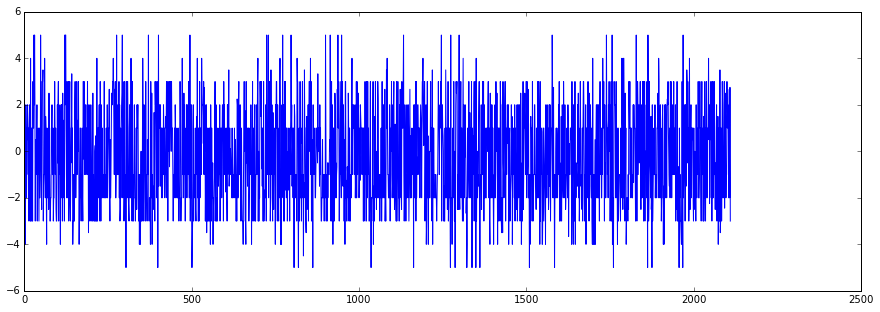

In [54]:
plt.figure(figsize = (15,5))
plt.plot(tag_scores.values())